In [1]:
import numpy as np
from matplotlib import pyplot as plt
from QUBO import QMatrix, QUBOSolution
from qutip import *
import networkx as nx
import dwave_networkx as dnx
import itertools
import minorminer as mm
from scipy import interpolate
from itertools import combinations
from collections import defaultdict
from graphs import DrawSolution, NetworkToFile, FileToNetwork
from graphs import DrawNetwork, GraphPartitioning, RandomGraphGenerator

In [63]:
def nextState(state):
    '''
    Modifies a given QUBO state into a new one
    
    Parameters
    ----------
    state  : array
             state of the QUBO Hamiltonian
    '''
    n = len(state) - 1
    aux = False
    
    while not (aux):
        
        if (state[n] == 0):
            aux = True
            break
        
        n -= 1
        if (n < 0):
            break
    
    state[n] = 1
    n += 1
    while (n < len(state)):
        state[n] = 0
        n +=1


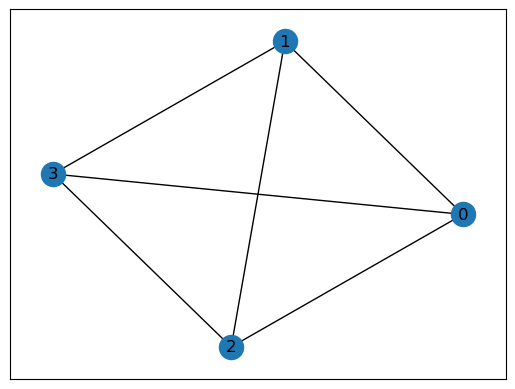

In [32]:
#Create the graph
G = FileToNetwork("graph3.txt")
DrawNetwork(G, "3.png")
n = nx.number_of_nodes(G)
m = nx.number_of_edges(G)
alpha = 1.25
beta=1
RCS = 0.5

In [33]:
#Embedding
C = FileToNetwork("chimera.txt")
#embedding = mm.find_embedding(G, C)
embedding = {1: [1779], 0: [1783, 1777], 3: [1781, 1776], 2: [1780]}

physical_nodes = []
for vertex in embedding:
    for node in embedding[vertex]:
        physical_nodes.append(node)
num_physical_qubits = len(physical_nodes)
print(num_physical_qubits)
print(physical_nodes)

6
[1779, 1783, 1777, 1781, 1776, 1780]


In [34]:
{(861, 856): 0.5, (858, 861): 0.5, (860, 856): 0.5, (860, 858): -1.5, (859, 861): 0.5, (859, 860): 0.25, (863, 856): 0.5, (863, 858): 0.25, (863, 859): -1.5, (856, 856): -0.75, (861, 861): -0.75, (858, 858): 0.375, (860, 860): 0.375, (859, 859): 0.375, (863, 863): 0.375}

{(861, 856): 0.5,
 (858, 861): 0.5,
 (860, 856): 0.5,
 (860, 858): -1.5,
 (859, 861): 0.5,
 (859, 860): 0.25,
 (863, 856): 0.5,
 (863, 858): 0.25,
 (863, 859): -1.5,
 (856, 856): -0.75,
 (861, 861): -0.75,
 (858, 858): 0.375,
 (860, 860): 0.375,
 (859, 859): 0.375,
 (863, 863): 0.375}

In [35]:
{(1777, 1783): -1.5, (1779, 1783): 0.5, (1781, 1777): 0.25, (1781, 1779): 0.5, (1776, 1783): 0.25, (1776, 1781): -1.5, (1780, 1777): 0.5, (1780, 1779): 0.5, (1780, 1776): 0.5, (1783, 1783): 0.375, (1777, 1777): 0.375, (1779, 1779): -0.75, (1781, 1781): 0.375, (1776, 1776): 0.375, (1780, 1780): -0.75}

{(1777, 1783): -1.5,
 (1779, 1783): 0.5,
 (1781, 1777): 0.25,
 (1781, 1779): 0.5,
 (1776, 1783): 0.25,
 (1776, 1781): -1.5,
 (1780, 1777): 0.5,
 (1780, 1779): 0.5,
 (1780, 1776): 0.5,
 (1783, 1783): 0.375,
 (1777, 1777): 0.375,
 (1779, 1779): -0.75,
 (1781, 1781): 0.375,
 (1776, 1776): 0.375,
 (1780, 1780): -0.75}

In [75]:
dim = pow(2,6)
states = itertools.product([0,1], repeat = 6)
states = list(states)
states_list= []
for i  in range(dim):
    states_list.append(states[i])
print(states_list)

[(0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 1, 0), (0, 0, 0, 0, 1, 1), (0, 0, 0, 1, 0, 0), (0, 0, 0, 1, 0, 1), (0, 0, 0, 1, 1, 0), (0, 0, 0, 1, 1, 1), (0, 0, 1, 0, 0, 0), (0, 0, 1, 0, 0, 1), (0, 0, 1, 0, 1, 0), (0, 0, 1, 0, 1, 1), (0, 0, 1, 1, 0, 0), (0, 0, 1, 1, 0, 1), (0, 0, 1, 1, 1, 0), (0, 0, 1, 1, 1, 1), (0, 1, 0, 0, 0, 0), (0, 1, 0, 0, 0, 1), (0, 1, 0, 0, 1, 0), (0, 1, 0, 0, 1, 1), (0, 1, 0, 1, 0, 0), (0, 1, 0, 1, 0, 1), (0, 1, 0, 1, 1, 0), (0, 1, 0, 1, 1, 1), (0, 1, 1, 0, 0, 0), (0, 1, 1, 0, 0, 1), (0, 1, 1, 0, 1, 0), (0, 1, 1, 0, 1, 1), (0, 1, 1, 1, 0, 0), (0, 1, 1, 1, 0, 1), (0, 1, 1, 1, 1, 0), (0, 1, 1, 1, 1, 1), (1, 0, 0, 0, 0, 0), (1, 0, 0, 0, 0, 1), (1, 0, 0, 0, 1, 0), (1, 0, 0, 0, 1, 1), (1, 0, 0, 1, 0, 0), (1, 0, 0, 1, 0, 1), (1, 0, 0, 1, 1, 0), (1, 0, 0, 1, 1, 1), (1, 0, 1, 0, 0, 0), (1, 0, 1, 0, 0, 1), (1, 0, 1, 0, 1, 0), (1, 0, 1, 0, 1, 1), (1, 0, 1, 1, 0, 0), (1, 0, 1, 1, 0, 1), (1, 0, 1, 1, 1, 0), (1, 0, 1, 1, 1, 1), (1, 1, 0, 0, 0, 0), (1, 1, 0, 0, 0, 1),

In [69]:
a = [1,0]
b = [1,0]
print(np.kron(a,b))

[1 0 0 0]


In [74]:
for i in range(dim):
    
    vect = []
    for j in range(6):
        vect.append([]) 
        
    for j in range(6):
        if (states_list[i][0][j] == 0):
            vect[j].append([0,1])
        else:
            vect[j].append([1,0])
            
    aux1 = np.kron(np.kron(vect[0], vect[1]), vect[2])
    aux2 = np.kron(np.kron(vect[3], vect[4]), vect[5])
    state = np.kron(aux1, aux2)
    print(state)
    #states_list[i].append(state)
    
        

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 